**Project Introduction**

This project aims to analyze traffic flow data to identify patterns, predict traffic conditions,
and provide actionable insights for stakeholders.

The analysis involves exploratory data
analysis (EDA) and machine learning models to achieve these objectives.

Preprocessing: The Time and Date columns are converted to
appropriate formats, and relevant features like Hour, Month, and
Day are extracted.

Label Encoding: Categorical features like Day of the week and
Traffic Situation are encoded to numerical values.

 Feature Selection: The features (Time, Day of the week, CarCount, etc.) are
selected for training.

Model Training: A RandomForestClassifier is used to predict the
traffic situation.

Evaluation: The model’s performance is evaluated using confusion
matrix, classification report, and accuracy score.

Feature Importance: A plot showing the importance of each feature
in predicting the traffic situation is generated.



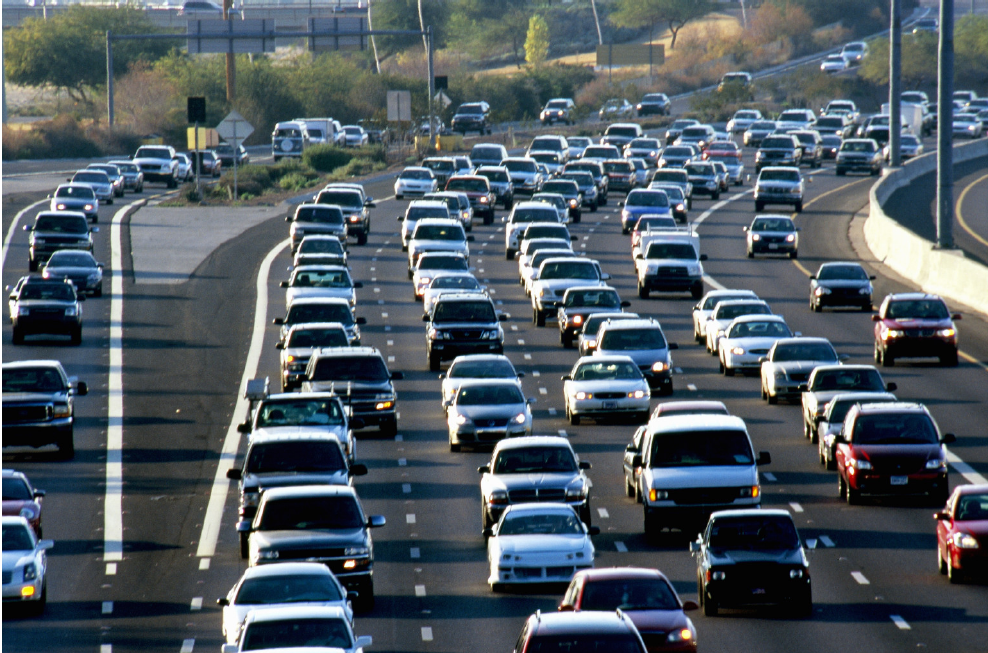

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [2]:
df = pd.read_csv("/content/drive/MyDrive/TrafficDataset.csv.xls")

Data Preprocessing

In [3]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10-10-2023,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10-10-2023,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10-10-2023,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10-10-2023,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10-10-2023,Tuesday,11,2,1,34,48,normal


In [4]:
df.shape

(2976, 9)

In [5]:
df.dtypes

,0
Time,object
Date,object
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


Here, the time, date and traffic situation has object data type. We need to convert it to float
data type. But first, I am checking the values in the column

In [6]:
df["Time"].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [7]:
# Convert 'Time' to minutes
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour * 60 + pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.minute


In [8]:
df['Time'].unique()

array([   0,   15,   30,   45,   60,   75,   90,  105,  120,  135,  150,
        165,  180,  195,  210,  225,  240,  255,  270,  285,  300,  315,
        330,  345,  360,  375,  390,  405,  420,  435,  450,  465,  480,
        495,  510,  525,  540,  555,  570,  585,  600,  615,  630,  645,
        660,  675,  690,  705,  720,  735,  750,  765,  780,  795,  810,
        825,  840,  855,  870,  885,  900,  915,  930,  945,  960,  975,
        990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140,
       1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305,
       1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425], dtype=int32)

In [9]:
df["Date"].unique()

array(['10-10-2023', '11-10-2023', '12-10-2023', '13-10-2023',
       '14-10-2023', '15-10-2023', '16-10-2023', '17-10-2023',
       '18-10-2023', '19-10-2023', '20-10-2023', '21-10-2023',
       '22-10-2023', '23-10-2023', '24-10-2023', '25-10-2023',
       '26-10-2023', '27-10-2023', '28-10-2023', '29-10-2023',
       '30-10-2023', '31-10-2023', '01-11-2023', '02-11-2023',
       '03-11-2023', '04-11-2023', '05-11-2023', '06-11-2023',
       '07-11-2023', '08-11-2023', '09-11-2023'], dtype=object)

In [10]:
print("Raw Date Data:")
print(df['Date'].head(10))


Raw Date Data:
0    10-10-2023
1    10-10-2023
2    10-10-2023
3    10-10-2023
4    10-10-2023
5    10-10-2023
6    10-10-2023
7    10-10-2023
8    10-10-2023
9    10-10-2023
Name: Date, dtype: object


In [11]:
# Convert 'Date' to datetime format (dd-mm-yyyy)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')



In [12]:
# Check for any missing values or incorrect parsing
print("\nConverted Date Data:")
print(df['Date'].head(10))



Converted Date Data:
0   2023-10-10
1   2023-10-10
2   2023-10-10
3   2023-10-10
4   2023-10-10
5   2023-10-10
6   2023-10-10
7   2023-10-10
8   2023-10-10
9   2023-10-10
Name: Date, dtype: datetime64[ns]


In [13]:
print("Missing values in 'Date':", df['Date'].isna().sum())

Missing values in 'Date': 0


In [14]:
# Convert to days since a reference date
reference_date = pd.Timestamp('2023-10-09')
df['Date'] = (df['Date'] - reference_date).dt.days


In [15]:
# Verify the final result
print("\nFinal Date Data:")
print(df.dtypes)
print(df.head())
print(df.tail())


Final Date Data:
Time                  int32
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object
   Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0     0     1         Tuesday        13          2         2          24   
1    15     1         Tuesday        14          1         1          36   
2    30     1         Tuesday        10          2         2          32   
3    45     1         Tuesday        10          2         2          36   
4    60     1         Tuesday        11          2         1          34   

   Total Traffic Situation  
0     41            normal  
1     52            normal  
2     46            normal  
3     50            normal  
4     48            normal  
      Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
2971  

In [16]:
df["Traffic Situation"].unique()

array(['normal', 'low', 'heavy', 'high'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder =LabelEncoder()
df['Traffic Situation']=label_encoder.fit_transform(df['Traffic Situation'])

In [18]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,1,Tuesday,13,2,2,24,41,3
1,15,1,Tuesday,14,1,1,36,52,3
2,30,1,Tuesday,10,2,2,32,46,3
3,45,1,Tuesday,10,2,2,36,50,3
4,60,1,Tuesday,11,2,1,34,48,3


In [19]:
df["Traffic Situation"].unique()

array([3, 2, 0, 1])

In [20]:
df.describe()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,712.500000,16.000000,62.184812,9.405578,10.546371,21.967742,104.104503,2.329637
std,415.739495,8.945775,43.384148,9.275747,9.774527,10.312510,50.972085,1.120568
min,0.000000,1.000000,5.000000,0.000000,0.000000,5.000000,25.000000,0.000000
25%,356.250000,8.000000,15.000000,2.000000,2.000000,13.000000,53.000000,2.000000
50%,712.500000,16.000000,61.000000,7.000000,8.000000,21.000000,101.000000,3.000000
75%,1068.750000,24.000000,97.000000,15.000000,17.000000,30.000000,144.000000,3.000000
max,1425.000000,31.000000,150.000000,50.000000,40.000000,60.000000,227.000000,3.000000


In [21]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   int32 
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   int64 
dtypes: int32(1), int64(7), object(1)
memory usage: 197.8+ KB


Vehicle Counts Over Time(lineplot)

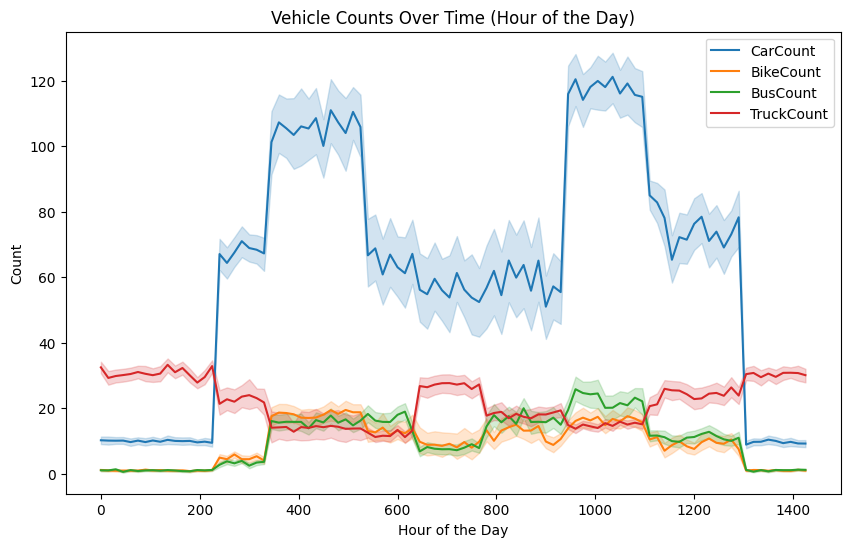

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='CarCount', label='CarCount')
sns.lineplot(data=df, x='Time', y='BikeCount', label='BikeCount')
sns.lineplot(data=df, x='Time', y='BusCount', label='BusCount')
sns.lineplot(data=df, x='Time', y='TruckCount', label='TruckCount')
plt.title('Vehicle Counts Over Time (Hour of the Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()

The graph shows vehicle traffic patterns over time. Cars have the highest volume, followed by bikes, buses, and trucks. There are two peak periods: morning and evening. Bikes and cars increase significantly during these times. Buses are relatively consistent, while trucks are lower overall.

Total Vehicles by day of the week(boxplot)

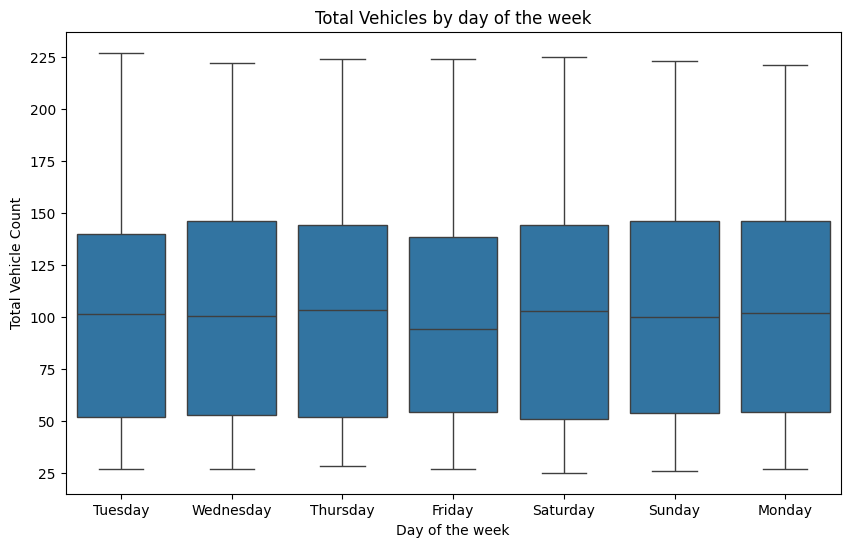

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x ='Day of the week',y ='Total')
plt.title('Total Vehicles by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Total Vehicle Count')
plt.show()

The graph shows the total number of vehicles for each day of the week. The box plots indicate the median, quartiles, and outliers for each day. There is no significant difference in the overall vehicle count across the days. However, there is some variation in the spread of the data for each day.


In [25]:
le=label_encoder
df["Day of the week"]=le.fit_transform(df["Day of the week"])

In [26]:
df["Day of the week"].unique()

array([5, 6, 4, 0, 2, 3, 1])

correlation Heatmap

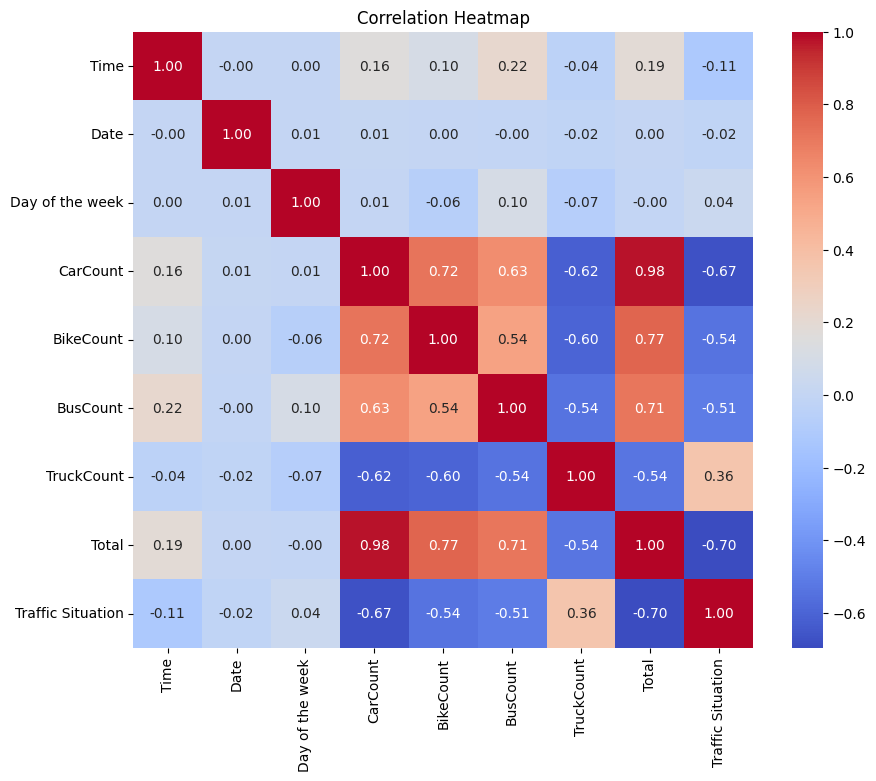

In [27]:
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),annot =True,cmap ='coolwarm',fmt ='.2f')
plt.title('Correlation Heatmap')
plt.show()

The graph shows the correlation between different variables related to traffic data. The color scale indicates the strength and direction of the correlation. For example, a strong positive correlation is shown in red, while a strong negative correlation is shown in blue. Key observations include:

CarCount and BikeCount: These variables have a strong positive correlation, indicating that they tend to increase or decrease together. TruckCount and Traffic Situation: These variables have a strong negative correlation, suggesting that increased truck traffic is associated with lower traffic conditions. Time and Traffic Situation: There is a weak negative correlation between time and traffic situation, indicating that traffic tends to be better at certain times of the day.

Hypothesis from the EDA

Based on the exploratory data analysis, we hypothesize that:

*  Traffic volume varies significantly by the time of day and day of the week.
*   Certain vehicle types might dominate traffic at specific times (e.g., more trucks at night).


*   Certain vehicle types might dominate traffic at specific times (e.g., more trucks at night).

*  The correlation between different vehicle types may indicate patterns in traffic flow.


*   Predicting traffic situations might be feasible using machine learning models based on vehicle counts.

Text(0, 0.5, 'count')

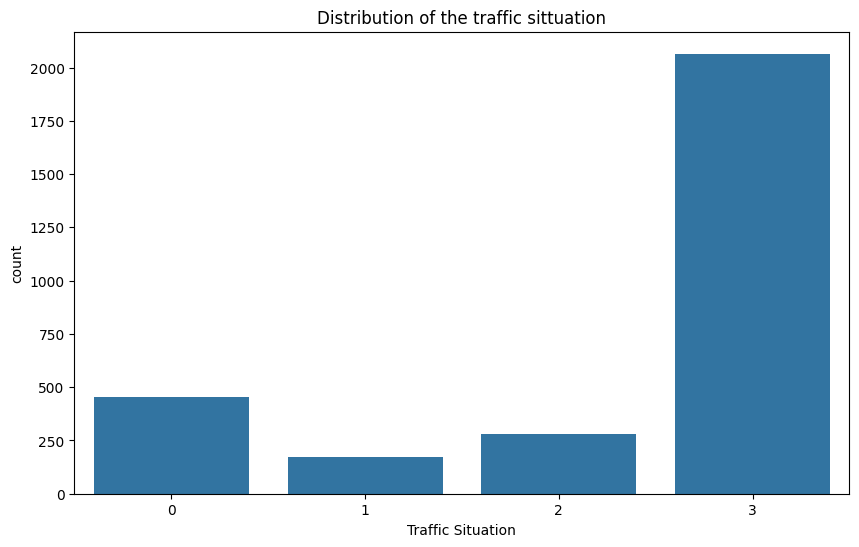

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x="Traffic Situation",data=df)
plt.title("Distribution of the traffic sittuation")
plt.xlabel("Traffic Situation")
plt.ylabel("count")

The graph shows the distribution of traffic situations. The x-axis represents different traffic situations (0, 1, 2, 3), and the y-axis represents the count of each traffic situation. The majority of traffic situations fall into category 3, with significantly fewer occurrences in categories 0, 1, and 2.

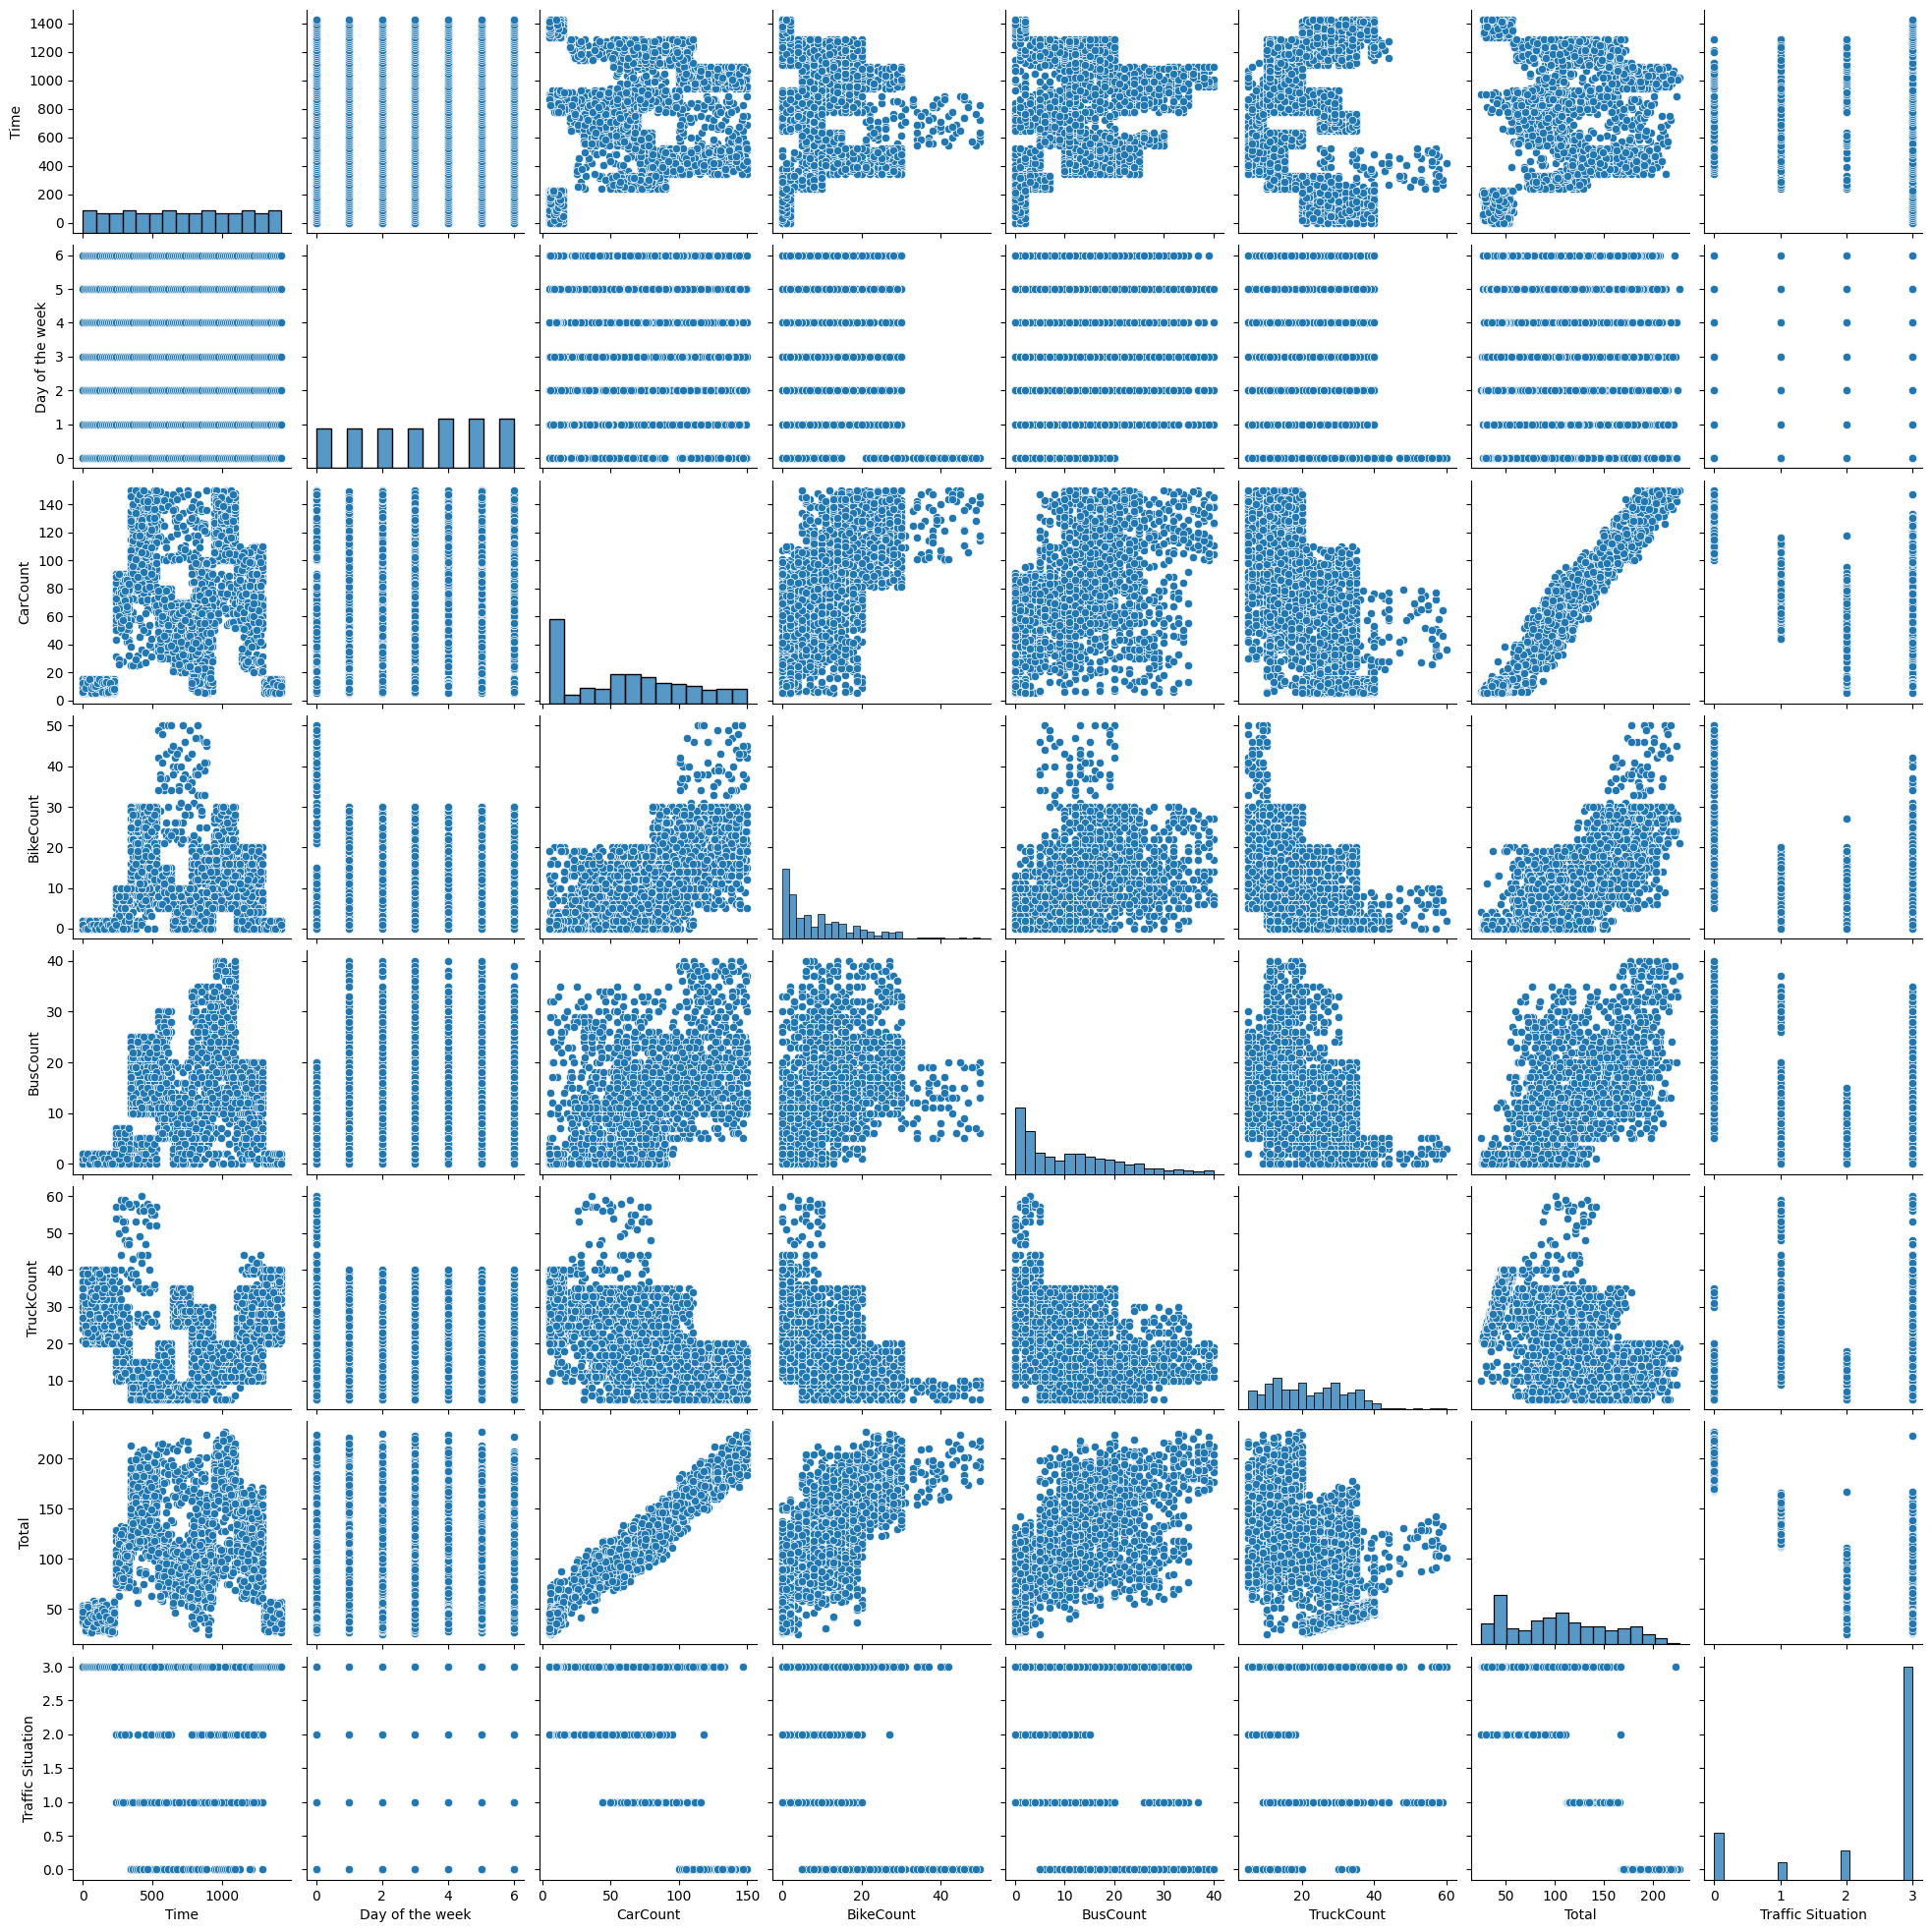

In [29]:
#  Pairplot
sns.pairplot(df[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']])
plt.show()

The graph is a pair plot that shows the relationships between different variables related to traffic data. Each subplot represents a pair of variables, with scatter plots showing the relationship between the two variables and histograms showing the distribution of each variable. Key observations include:

Positive correlation between CarCount and BikeCount: The scatter plot shows a clear upward trend, indicating that as CarCount increases, BikeCount also tends to increase.

Negative correlation between TruckCount and Traffic Situation: The scatter plot shows a downward trend, suggesting that as TruckCount increases, Traffic Situation tends to decrease.

No clear relationship between Time and Traffic Situation: The scatter plot shows a random distribution of points, indicating that there is no strong correlation between these two variables.

<ipython-input-30-d3851714c634>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y='Time', data=df, palette='Set1')


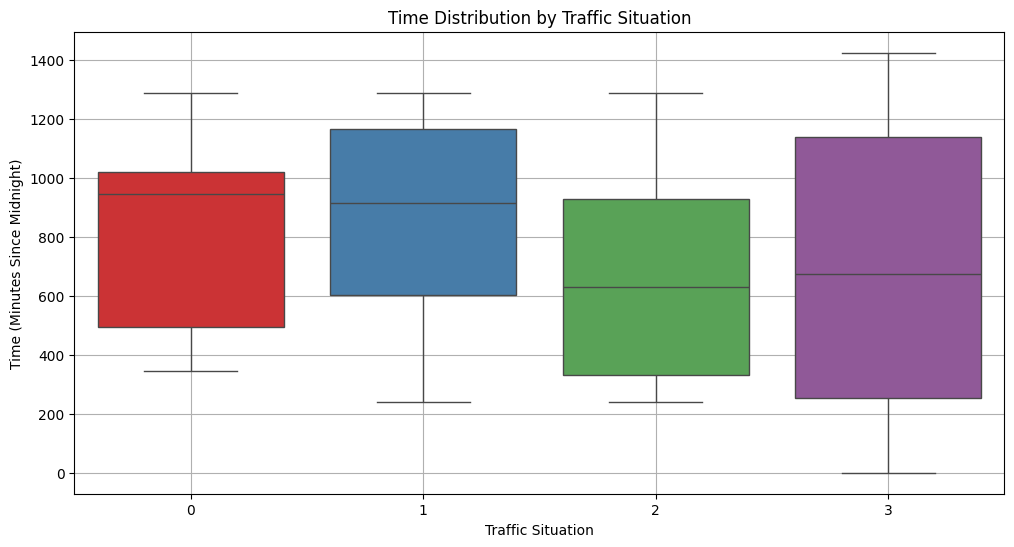

In [30]:
# Convert 'Traffic Situation' to categorical
df['Traffic Situation'] = pd.Categorical(df['Traffic Situation']).codes

# Create a box plot to show distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Situation', y='Time', data=df, palette='Set1')
plt.title('Time Distribution by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Time (Minutes Since Midnight)')
plt.grid(True)
plt.show()


Displays the distribution of Time for each Traffic Situation category. Helps to visualize the range and median of Time values for different traffic situations.


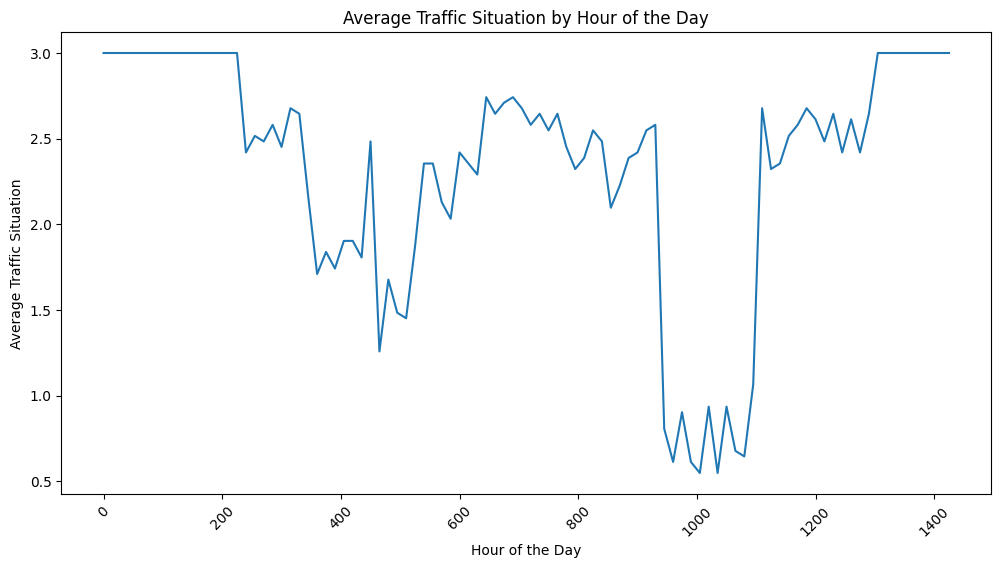

In [31]:
# Alternatively, a line plot to show average traffic situation over the hours
plt.figure(figsize=(12, 6))
avg_traffic_by_time = df.groupby('Time')['Traffic Situation'].mean()
sns.lineplot(x=avg_traffic_by_time.index, y=avg_traffic_by_time.values)
plt.title('Average Traffic Situation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Situation')
plt.xticks(rotation=45)
plt.show()

The line plot shows the average traffic situation for each hour of the day, providing a continuous view of traffic trends over time.

Model Training & Evaluation

The code trains a Random Forest Classifier model to predict traffic situations based on features like time, day of week, and vehicle counts. It splits data into training and testing sets, scales features, trains the model, and evaluates its performance using metrics like accuracy, precision, recall, and F1-score.

In [32]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,1,5,13,2,2,24,41,3
1,15,1,5,14,1,1,36,52,3
2,30,1,5,10,2,2,32,46,3
3,45,1,5,10,2,2,36,50,3
4,60,1,5,11,2,1,34,48,3


In [36]:
#select features and target
X =df [['Time','Date','Day of the week','CarCount','BikeCount','BusCount','TruckCount']]
y =df['Traffic Situation']

In [37]:
#splitting the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.2,random_state =42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [39]:
#import RandomForest
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators =100,random_state =42)
model.fit(X_train,y_train)
#Make predictions
y_pred =model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 79   1   0   6]
 [  1  32   0   6]
 [  1   0  52   0]
 [  6   2   3 407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        86
           1       0.91      0.82      0.86        39
           2       0.95      0.98      0.96        53
           3       0.97      0.97      0.97       418

    accuracy                           0.96       596
   macro avg       0.93      0.92      0.93       596
weighted avg       0.96      0.96      0.96       596

Accuracy Score: 0.9563758389261745


Report Description
The overall accuracy of the model is 0.95, which indicates that it correctly predicted 95% of
the traffic situations in the testing set.
The precision, recall, and F1-score for each class are all relatively high, ranging from 0.89 to
0.99. This suggests that the model is able to accurately identify and predict different traffic
situations.
Class 3 has the highest precision, recall, and F1-score, indicating that the model is
particularly good at predicting this class.
Feature

Feature Importance

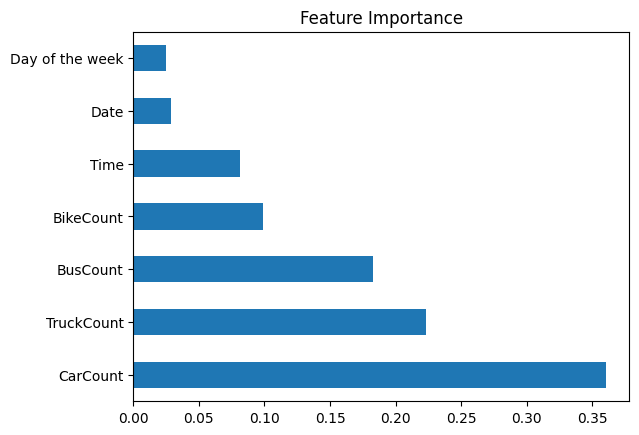

In [41]:
feature_importances =pd.Series(model.feature_importances_,index =X.columns)
feature_importances.nlargest(10).plot(kind ='barh')
plt.title('Feature Importance')
plt.show()

Graph Description

The graph shows the feature importance for a machine learning model. The x-axis represents
the feature importance, and the y-axis represents the features. The length of each bar
indicates the importance of that feature in predicting the target variable. In this case,
CarCount is the most important feature, followed by TruckCount and BusCount.


Conclusion

The Traffic Flow Prediction project provides critical insights into traffic patterns, highlighting
peak congestion times and the impact of external factors such as weather or road conditions.
By analyzing time-based traffic situations, the model identifies trends that can assist traffic
authorities in managing congestion more effectively. The ability to predict traffic flow
enables stakeholders to implement proactive measures, such as optimizing signal timings,
adjusting public transport schedules, and planning road maintenance during low-traffic
periods. These predictions can also support real-time traffic monitoring and alert systems,
allowing for dynamic rerouting and minimizing disruptions during high-traffic periods.

Moreover, this project has broader implications for smart city integration and sustainability.
By incorporating predictive traffic data, city planners can design more efficient road networks
and reduce congestion, which in turn lowers vehicle emissions and fuel consumption. This
contributes to environmental goals while also boosting economic productivity by reducing
time spent in traffic. Ultimately, the traffic flow prediction model offers a data-driven
approach to improving urban mobility, enhancing resource allocation, and fostering a more
efficient and sustainable transportation ecosystem.